In [ ]:
%load_ext autoreload
%autoreload 2
# default_exp indexers.facerecognition.photo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Photo

This file contains many convenience functions and classes to work with photos in the context of importing data from external sources and machine learning. It contains functions for reading, plotting, resizing, etc. 

In [ ]:
# export
from pyintegrators.data.schema import *
from pyintegrators.data.basic import *
from insightface.utils import face_align
from matplotlib.pyplot import imshow
from matplotlib import patches
from matplotlib.collections import PatchCollection
from numpy.linalg import norm
from hashlib import sha256
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
# export
def show_images(images, cols = 3, titles = None):
    image_list = [x.data for x in images] if isinstance(images[0], Photo) else images
    assert((titles is None) or (len(image_list) == len(titles)))
    n_images = len(image_list)
    if titles is None: titles = ["" for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(image_list, titles)):
        a = fig.add_subplot(int(np.ceil(n_images/float(cols))), cols , n + 1)
        a.axis('off')
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image[:,:,::-1])
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
def get_size(img, maxsize):
    s = img.shape
    assert len(s) > 1
    div = max(s) / maxsize
    return (int(s[1]//div), int(s[0]//div))

def resize(img, maxsize):
    size = get_size(img, maxsize)
    return cv2.resize(img, dsize=size, interpolation=cv2.INTER_CUBIC)

def get_height_width_channels(img):
    s = img.shape
    if len(s) == 2: return s[0], s[1], 1
    else: return img.shape

In [ ]:
# export  
class IPhoto(Photo):
    
    def __init__(self, data=None, embedding=None,path=None, *args, **kwargs):
        self.private = ["data", "embedding", "path"]
        super().__init__(*args, **kwargs)
        self.data=data
        self.embedding=embedding
        self.path=path

    def show(self):
        fig,ax = plt.subplots(1)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        ax.axis('off')
        imshow(self.data[:,:,::-1])
        fig.set_size_inches((6,6))
        plt.show()
        
    def draw_boxes(self, boxes):
        print(f"Plotting {len(boxes)} face boundingboxes")
        fig,ax = plt.subplots(1)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        ax.axis('off')

        # Display the image
        ax.imshow(self.data[:,:,::-1])

        ps = []
        # Create a Rectangle patch
        for b in boxes:
            rect = self.box_to_rect(b)
            ax.add_patch(rect)    
            ps.append(rect)
        fig.set_size_inches((6,6))
        plt.show()
        
    def get_crop(self, box, landmark=None):
        b = [max(0, int(x)) for x in box]
        if landmark is not None:
            return face_align.norm_crop(self.data, landmark=landmark)
        else:
            return self.data[b[1]:b[3], b[0]:b[2], :]
        
    def get_crops(self, boxes, landmarks=None):
        crops = []
        if landmarks is None:
            print("you are getting unnormalized crops, which are lower quality for recognition")
        for i, b in enumerate(boxes):
            crop = self.get_crop(b, landmarks[i] if landmarks is not None else None)
            crops.append(crop)
        return crops
    
    def plot_crops(self, boxes, landmarks=None):
        crops = self.get_crops(boxes, landmarks)
        show_images(crops, cols=3)
        
    @classmethod
    def from_data(cls,*args, **kwargs):
        res = super().from_data(*args, **kwargs)
        if res.file:
            res.file[0]
        return res
        
    @classmethod    
    def from_path(cls, path, size=None):
        data = cv2.imread(str(path))
        res = cls.from_np(data, size)
        return res

    @classmethod
    def from_np(cls, data, size=None, *args, **kwargs):
        if size is not None: data = resize(data, size)
        h,w,c = get_height_width_channels(data)
        res = cls(data=data, height=h, width=w, channels=c, *args, **kwargs)
        file = File.from_data(sha256=sha256(data.tobytes()).hexdigest())
        res.add_edge("file", file)
        return res
    
    @staticmethod
    def box_to_rect(box):
        x = box[0]
        y = box[1]
        w = box[2]-box[0]
        h = box[3]-box[1]
        return patches.Rectangle((x,y),w,h, linewidth=2,edgecolor='r',facecolor='none')
        

In [ ]:
p = IPhoto.from_path(PYI_TESTDATA / "photos" / "faceclustering" / "modern_family1.jpg")

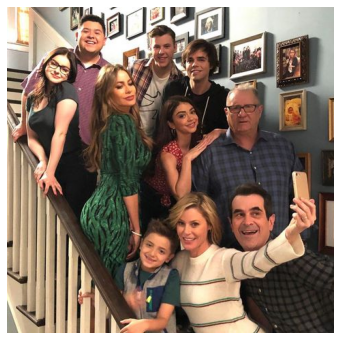

In [ ]:
p.show()

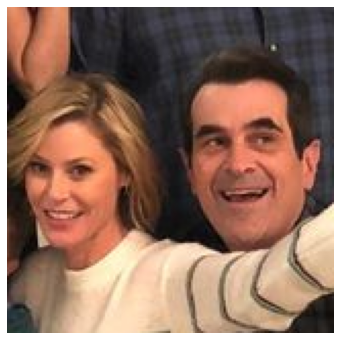

In [ ]:
box = [240,240,400,400] 
crop = p.get_crop(box)
crop = IPhoto.from_np(crop)
crop.show()

Plotting 1 face boundingboxes


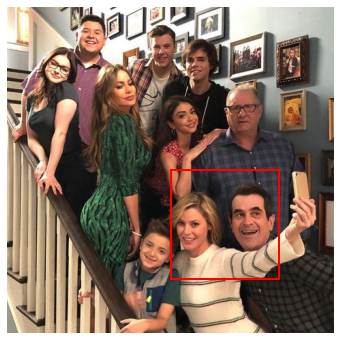

In [ ]:
p.draw_boxes([box])

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted basic.ipynb.
Converted importers.EmailImporter.ipynb.
Converted importers.Importer.ipynb.
Converted importers.util.ipynb.
Converted index.ipynb.
Converted indexers.FaceClusteringIndexer.Models.ipynb.
Converted indexers.FaceClusteringIndexer.Utils.ipynb.
Converted indexers.FaceClusteringIndexer.indexer.ipynb.
Converted indexers.FaceRecognitionModel.ipynb.
Converted indexers.FacerecognitionIndexer.Photo.ipynb.
Converted indexers.GeoIndexer.ipynb.
Converted indexers.NoteListIndexer.NoteList.ipynb.
Converted indexers.NoteListIndexer.Parser.ipynb.
Converted indexers.NoteListIndexer.ipynb.
Converted indexers.NoteListIndexer.util.ipynb.
Converted indexers.indexer.ipynb.
Converted itembase.ipynb.
Converted pod.client.ipynb.
